# Look of FrozenLake

In [ ]:
# Import libraries
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
env = gym.make("FrozenLake-v1", desc=generate_random_map(size=4), map_name="4x4", is_slippery=True, render_mode="human")
observation, info = env.reset(seed=42)

# Run Frozen Lake for 100 steps
for _ in range(25):
   action = env.action_space.sample()  # this is where you would insert your policy
   # observation, reward, terminated, truncated, info = env.step(action)
   state = env.step(action)
   observation, reward, terminated, truncated, info = state
   print(state)

   if terminated or truncated:
      observation, info = env.reset()

env.close()

# Compare All Reinforcement Learning Models

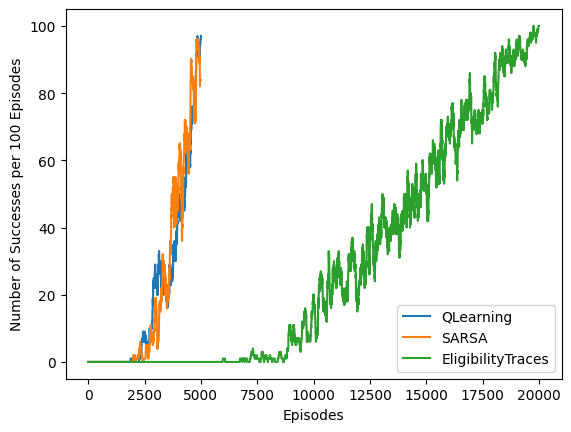

In [88]:
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import LearningMethods.QLearning as ql
import LearningMethods.SARSA as sar
import LearningMethods.DynamicProgramming as dp
import LearningMethods.EligibilityTraces as ele
import FrozenLakeFunctions as flf
import imp
imp.reload(ql)
imp.reload(sar)
imp.reload(dp)
imp.reload(ele)

size = 12
env_seed = generate_random_map(size=size)
DynamicProgramming_model = dp.DynamicProgramming(env_seed)
QLearning_model = ql.QLearning(5000, env_seed)
Sarsa_model = sar.SARSA(5000, env_seed)
ElegibilityTraces_model = ele.EligibilityTraces(20000, env_seed)
plt.xlabel('Episodes')
plt.ylabel('Number of Successes per 100 Episodes')
plt.savefig('images/frozen_lake_model_comparison.png')

# See All Models

In [89]:
import FrozenLakeFunctions as flf
import imp
imp.reload(flf)

flf.seeModelState(DynamicProgramming_model, env_seed)
flf.seeModel(QLearning_model, env_seed)
flf.seeModel(Sarsa_model, env_seed)
flf.seeModel(ElegibilityTraces_model, env_seed)

# See All Policys

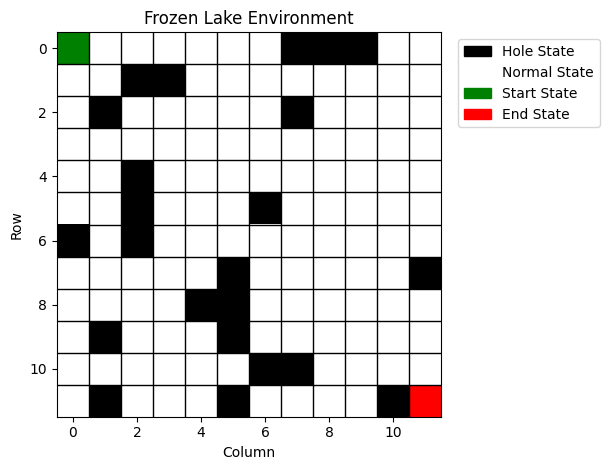

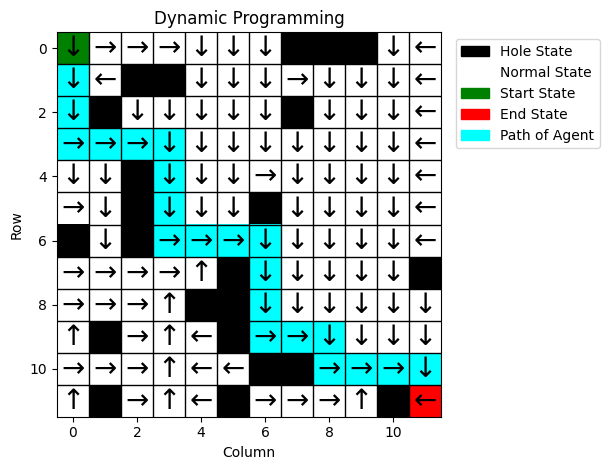

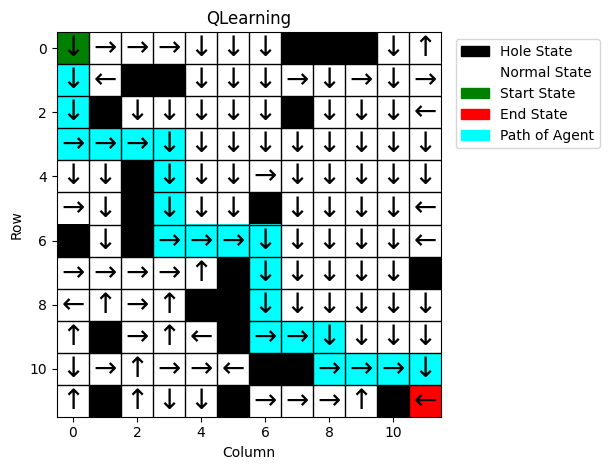

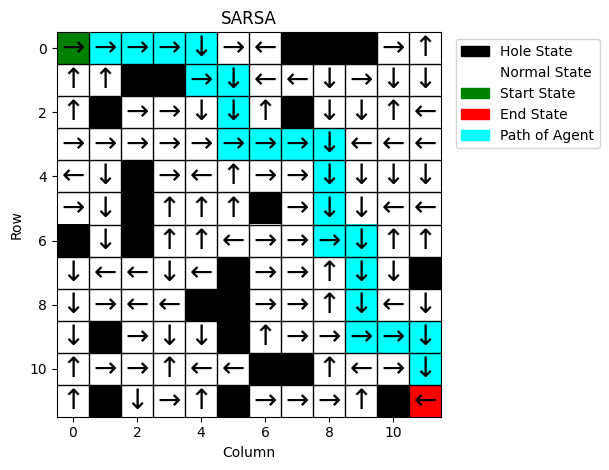

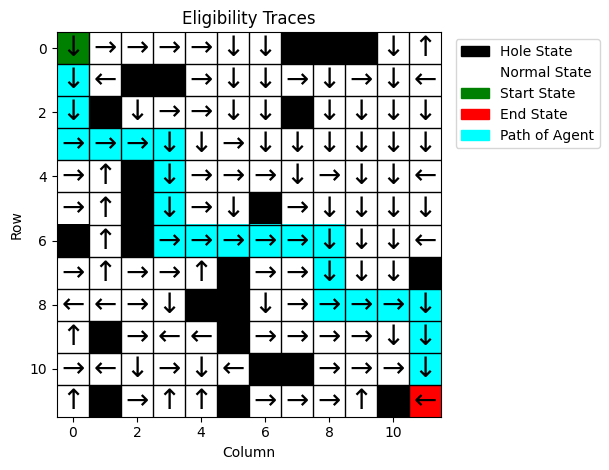

In [96]:
import FrozenLakeFunctions as flf
import imp
imp.reload(flf)

env_array = flf.seeEnv(env_seed, size)
flf.visualize_policy(DynamicProgramming_model, "Dynamic Programming", size, env_array, env_seed)
env_array = flf.getBoard(env_seed, size)
flf.visualize_QTable(QLearning_model, "QLearning", size, env_array, env_seed)
env_array = flf.getBoard(env_seed, size)
flf.visualize_QTable(Sarsa_model, "SARSA", size, env_array, env_seed)
env_array = flf.getBoard(env_seed, size)
flf.visualize_QTable(ElegibilityTraces_model, "Eligibility Traces", size, env_array, env_seed)